# Videos from DataSchool

In [2]:
import pandas as pd
import numpy as np

In [55]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
drinks.beer_servings.mean()

106.16062176165804

In [6]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [7]:
drinks[drinks.continent=='Africa'].beer_servings.max()

376

In [8]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


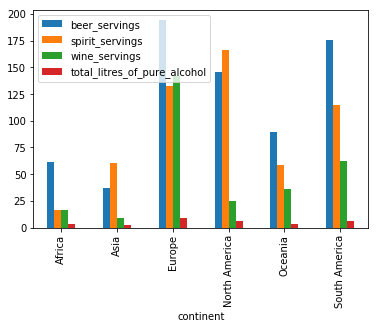

In [9]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

In [10]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train['sex_num'] = train.Sex.map({'female':0, 'male':1})

In [13]:
train.loc[0:4, ['Sex', 'sex_num']]

,Sex,sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [14]:
train['name_len'] = train.Name.apply(len)

In [15]:
train.loc[0:4, ['Name', 'name_len']]

,Name,name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [16]:
train['fare_ceil'] = train.Fare.apply(np.ceil)

In [17]:
train.loc[0:4, ['Fare', 'fare_ceil']]

,Fare,fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [18]:
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [19]:
def get_last(my_list, position):
    return my_list[position]

In [20]:
train.Name.str.split(',').apply(get_last,position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [21]:
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [22]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0) 
# axis = 0 is down the df, ie. row by row

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [23]:
# axis = 1 is across the row therefore max os any column across particular row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [24]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()
# find the max in any column for any row

C:\Users\User\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

In [25]:
# applymap is a df method, applies a fn to every element of a dataframe
# apply is a df OR series method
# map is a series method
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head() # changes ALL elements to float

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [26]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [27]:
ufo.loc[:,['City','Time']] # only City and Time

,City,Time
0,Ithaca,6/1/1930 22:00
1,Willingboro,6/30/1930 20:00
2,Holyoke,2/15/1931 14:00
3,Abilene,6/1/1931 13:00
4,New York Worlds Fair,4/18/1933 19:00
5,Valley City,9/15/1934 15:30
6,Crater Lake,6/15/1935 0:00
7,Alma,7/15/1936 0:00
8,Eklutna,10/15/1936 17:00
9,Hubbard,6/15/1937 0:00


In [33]:
ufo.loc[:,'City':'State'] # All columns from City to State

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [34]:
ufo.head(5).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [35]:
# chained indexing which can cause problems
ufo[ufo.City=='Oakland'].Time

1694      7/21/1968 14:00
2144       8/19/1971 0:00
4686        6/1/1982 0:00
7293      3/28/1994 17:00
8488      8/10/1995 21:45
8768     10/10/1995 22:40
10816     10/1/1997 21:30
10948    11/14/1997 19:55
11045     12/10/1997 1:30
12322     10/9/1998 19:40
12941     1/23/1999 21:30
16803      7/4/2000 23:00
17322      9/1/2000 21:35
Name: Time, dtype: object

In [36]:
# A better method
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [37]:
ufo.iloc[:,0:4]
# iloc is like range, it excludes the last value. i stands for integer

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [38]:
drinks2=pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')

In [39]:
drinks2.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [40]:
drinks2.ix[0:2,0:2] # ix is depercated, thank goodness! it is confusing

C:\Users\User\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,beer_servings,spirit_servings
country,,
Afghanistan,0,0
Albania,89,132


In [41]:
pd.__version__

'0.22.0'

# Create datetime and assign it as an index

In [43]:
df = pd.DataFrame([[12,25,2017,10],[1,15,2018,11]],columns=['month','day','year','hour'])
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11


In [47]:
pd.to_datetime(df)
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11


In [48]:
pd.to_datetime(df[['month','day','year']])

0   2017-12-25
1   2018-01-15
dtype: datetime64[ns]

In [49]:
df.index = pd.to_datetime(df[['month','day','year']])
df

,month,day,year,hour
2017-12-25,12,25,2017,10
2018-01-15,1,15,2018,11


# Read string values as categories for faster read/smaller file size

In [53]:
drink3 = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'continent':'category'})
drink3.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [57]:
drinks.memory_usage()

Index                             80
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [58]:
drink3.memory_usage()

Index                             80
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                        401
dtype: int64

# Convert multiple datatypes

In [59]:
drink4 = drinks.astype({'beer_servings':'float', 'spirit_servings':'float'})
drink4.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

# Multiple agg to a series

In [60]:
drinks.beer_servings.agg(['mean','min','max'])

mean    106.160622
min       0.000000
max     376.000000
Name: beer_servings, dtype: float64

In [61]:
drinks.agg(['mean','min','max'])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
max,Zimbabwe,376.000000,438.000000,370.000000,14.400000,South America
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
min,Afghanistan,0.000000,0.000000,0.000000,0.000000,Africa
